# PwC Challenge Data Scientist Jr


## Table Of Content

- [Load & Preprocess Data](#load--preprocess-data)
- [Training model](#training-the-model-and-getting-the-metrics)
- [Obtaining Bootstrap CI](#obtaining-bootstrap-confidence-intervals-for-the-metrics)
- [Comparison with DummyRegressor](#comparison-with-baseline-model)
- [Cross-Validation](#cross-validation)
- [Technical Conditions](#technical-conditions)

<hr></hr>

## Linear model for salary prediction

### Load & Preprocess data

In [1]:
from LinearRegression.preprocessing import load_and_preprocess_data

X_train, X_test, y_train, y_test = load_and_preprocess_data('data/DataTransformed.csv')

### Training the model and getting the metrics

In [2]:
from LinearRegression.my_model import train_and_evaluate_model

linear_model, mse, rmse, r2 = train_and_evaluate_model(X_train, X_test, y_train, y_test)

### Obtaining Bootstrap Confidence Intervals for the metrics

In [13]:
from LinearRegression.bootstrap import bootstrap_metrics

mse_interval, r2_interval = bootstrap_metrics(linear_model, X_train, y_train, X_test, y_test)
print(f"RMSE 95% confidence interval: ({float(mse_interval[0]):.2f}, {float(mse_interval[1]):.2f})")
print(f"R² 95% confidence interval: ({float(r2_interval[0]):.4f}, {float(r2_interval[1]):.4f})")

RMSE 95% confidence interval: (15087.83, 16004.23)
R² 95% confidence interval: (0.8831, 0.8961)


For our linear regression model we use 2 metrics <b>Root Mean Squared Error</b> (RMSE) and <b>R-Squared</b> (R²) for its evaluation:

- <b>RMSE</b>: Measures the average deviation of the predicted values from the actual values in the provided dataset. <b>At a 95% confidence level, predicted salaries deviate, on average, between $15087 and $16004</b>

- <b>R²</b>: Explains the proportion of variance in the target variable that can be explained by our trained model, useful for check the overall fit of the model. <b>At a 95% confidence level, the model is able to explain between 88% and 89% of the variance in the salary</b>

### Comparison with baseline model

In [4]:
from LinearRegression.dummy import get_dummy_regressor

dummy_rmse, dummy_r2 = get_dummy_regressor(X_train, y_train, X_test, y_test)
print("-- Dummy Regressor --")
print(f"RMSE: {dummy_rmse}")
print(f"R²: {dummy_r2}")

-- Dummy Regressor --
RMSE: 46817.61714419913
R²: -2.2481139502872338e-05


The trained model shows a substantial improvement over the Dummy Regressor, by both lower RMSE and higher R², <b>confirming that the model is indeed learning from the data and providing meaningful predictions</b>

### Cross-Validation

In [14]:
from LinearRegression.cross_validation import cross_validate_model

rmse_cv, r2_cv = cross_validate_model(linear_model, X_train, y_train, cv=5)
print("-- CROSS VALIDATION --")
print(f"RMSE 95% confidence interval: ({rmse_cv[0]:.2f}, {rmse_cv[1]:.2f})")
print(f"R² 95% confidence interval: ({r2_cv[0]:.4f}, {r2_cv[1]:.4f})")

-- CROSS VALIDATION --
RMSE 95% confidence interval: (13958.22, 17937.30)
R² 95% confidence interval: (0.8832, 0.9067)


* The model performs fairly well, with <b>R² values above 0.88 and RMSE values in the range of $13958 to $17937.</b>
* The model seems to capture a large portion of the variance in salary predictions but there is still room for improvement due to the relatively wide confidence interval.
* <b>Overall, the model shows strong predictive power</b>


### Technical Conditions

<b>1- Linearity</b>

Linearity can be checked in EDA.ipynb with the pairplot and correlation matrix.

<b>2- Homoscedasticity</b>

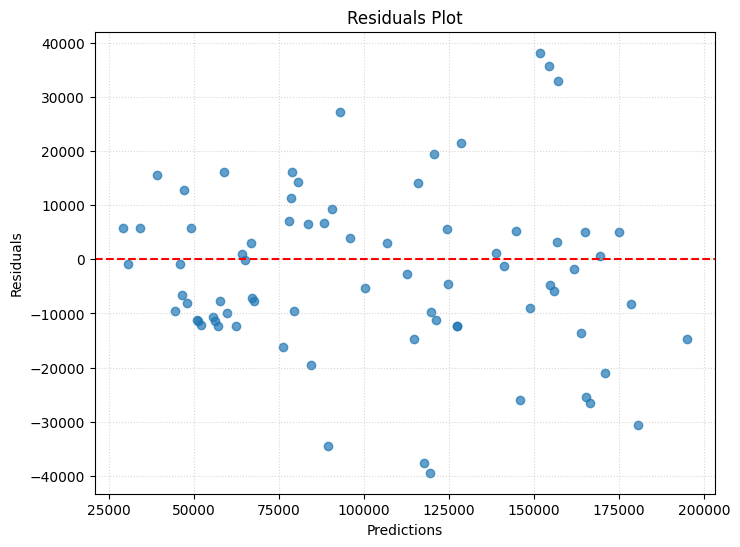

In [15]:
import matplotlib.pyplot as plt

y_pred = linear_model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6)) 
plt.scatter(y_pred, residuals, alpha=0.7)  
plt.axhline(y=0, color='r', linestyle='--')  
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

<b>3- Error Independence</b>

There is no temporal or spatial dependence in the data

<b>4- Normality of errors</b>

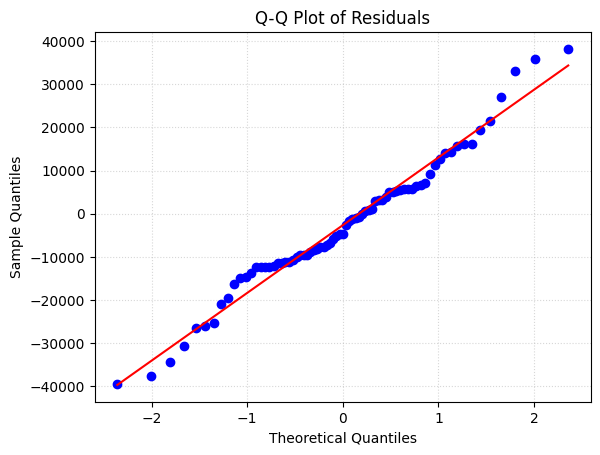

In [16]:
from scipy.stats import probplot

probplot(residuals, dist="norm", plot=plt)

plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

In [17]:
from scipy.stats import shapiro

stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk stat: {stat}')
print(f'p-value: {p_value}')

#Checking the p-value
if p_value > 0.05:
    print("Residuals follow a normal distribution (H0 is not rejected).")
else:
    print("The residuals don't follow a normal distribution (H0 is rejected).")

Shapiro-Wilk stat: 0.9785465595168882
p-value: 0.23283024576654698
Residuals follow a normal distribution (H0 is not rejected).
